In [2]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored

#Train Test Split
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

import keras

from transformers import BertTokenizer
from tqdm.auto import tqdm

import pandas as pd
import numpy as np

In [3]:
### loading google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/Data/data_for_model"

/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/Data/data_for_model


In [5]:
df=pd.read_csv("Final_data_model_no_stop_lement.csv")
df

,cleaned_text,class,selftext_length
0,what is the point see no point in doing life y...,suicide,282
1,had shotgun off safety in my mouth today i am ...,suicide,308
2,i am going to commit suicide within next few h...,suicide,76
3,depression and no one around be been dealing w...,suicide,108
4,nothing like seeing all the other posts around...,suicide,25
...,...,...,...
17015,accounts incredibly overdue a life entirely un...,stressed,28
17016,hey so i come from a middle class family and s...,stressed,59
17017,but then i will get there and he will drop the...,stressed,77
17018,i do not have the ability to cope with it anym...,stressed,61


In [6]:
dd=df[df["cleaned_text"].duplicated()]
dd["class"].value_counts()

stressed      2
depression    1
Name: class, dtype: int64

In [7]:
### Dropping na values and duplicates

df=df.dropna()
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [8]:
df["class"].value_counts()

suicide          10162
depression        4338
stressed          1484
casual-talk       1018
high-suicidal       16
Name: class, dtype: int64

In [9]:
## Splitting data to X and Y

X=df["cleaned_text"].astype(str)
Y= df['class']


In [10]:
### ensuring data is loaded in string format and analyzing max length of text

text_data= df['cleaned_text'].astype(str)

max_len=text_data.map(lambda x: len(x.split())).max()

max_len

982

In [11]:
### Looking at Statistics of data
df["selftext_length"]= [len(df["cleaned_text"][i].split()) for i in range(len(df))]
df["selftext_length"].describe()



count    17018.000000
mean       128.096897
std        107.049252
min          3.000000
25%         50.000000
50%         95.000000
75%        178.000000
max        982.000000
Name: selftext_length, dtype: float64

In [12]:
### Dropping depression and suicide data that are more than 500 words long because they are outiers
s
dd=df[df["selftext_length"]>=500]
dd["class"].value_counts()



depression    110
suicide         2
Name: class, dtype: int64

In [13]:
data=pd.DataFrame()
data["X"]=df["cleaned_text"].astype(str)
data["Y"]=df['class']

In [14]:
## Defining training and testing data. This way the model will never see the testing dataset

train_df,test_df= train_test_split(data,
                                   train_size=0.70, 
                                   shuffle=True, 
                                   random_state=42, 
                                   stratify=Y)

In [15]:
### encoding labels to 0-4 since we have 5 classes

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df['Sentiment_label'] = le.fit_transform(train_df['Y'])
test_df['Sentiment_label'] = le.transform(test_df['Y'])


In [16]:
## Creating label dict so we know what the encodings are

label_dict = (test_df[['Y','Sentiment_label']].drop_duplicates()
              .sort_values(by='Sentiment_label')
              .reset_index(drop=True)['Y']
              .to_dict())

for index, key in label_dict.items():
    print(index, key)

0 casual-talk
1 depression
2 high-suicidal
3 stressed
4 suicide


In [17]:
### Creating labels_5 variable for visualizng data into this class
labels_5 = ['Casual-Talk','Depression','Highly-Suicidal',"Stressed","Suicide"]

In [18]:
len(train_df)

11912

In [19]:
### training data and label
x_train = train_df['X']
y_train = train_df['Sentiment_label']

In [20]:
### testing data and labels

x_test = test_df['X']
y_test = test_df['Sentiment_label']
print(f"{len(x_test)} testing examples")

5106 testing examples


## Naive Bayes (Baseline Model)

### Creating abaseline model to compare models

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [22]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train, y_train)

In [ ]:
### Model Makes predictions
y_hat = model.predict(x_test)

In [ ]:
### writing function to show cosnfusion matrix


import seaborn as sns
print("Accuracy:", accuracy_score(y_test, y_hat))
labels_5 = ['Casual-Talk','Depression','Highly-Suicidal',"Stressed","Suicide"]

def print_cf1(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat)
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame(cm, index=labels_5,columns=[0,1,2,3,4]), 
                annot = True,
                annot_kws = {"size":16},
                fmt="d",
                cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.xticks([0,1,2,3,4], labels_5, rotation=45)
    plt.ylabel("True Value")
    plt.show()

Accuracy: 0.6390520955738347


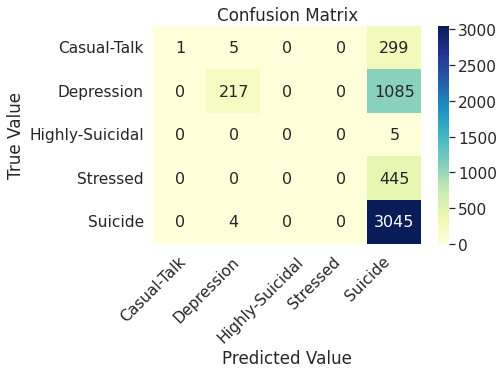

In [23]:
### Confusion Matrix of Bas Model
    
print_cf1(y_test, y_hat)

In [24]:
### Classification report of base model

print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       1.00      0.00      0.01       305
     Depression       0.96      0.17      0.28      1302
Highly-Suicidal       0.00      0.00      0.00         5
       Stressed       0.00      0.00      0.00       445
        Suicide       0.62      1.00      0.77      3049

       accuracy                           0.64      5106
      macro avg       0.52      0.23      0.21      5106
   weighted avg       0.68      0.64      0.53      5106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Building Bert Model

In [25]:
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.np_utils import to_categorical

### Converting Y to Categorical

# Y = keras.utils.to_categorical(Y, num_classes)
# labels = Y

## Bert

In [27]:
### using maximum length of text to 500

max_length=500

MAX_LENGTH=max_length
max_len=max_length
maxlen=max_len

In [28]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [29]:
### Defining Tokenizing function to tokenize texts


def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [30]:
### Tokenizing training and testing data

X_train = tokenize(x_train, tokenizer)
X_test = tokenize(x_test, tokenizer)

  0%|          | 0/11912 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


  0%|          | 0/5106 [00:00<?, ?it/s]

##### Building Model Architecture 

In [31]:
from transformers import TFBertModel
from transformers import AutoConfig

In [32]:
### model architecture

config = AutoConfig.from_pretrained("bert-base-cased", output_hidden_states=True, output_attentions=True)
bert = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer = bert.bert(input_ids = input_ids_in, attention_mask = input_masks_in)[0]

X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(embedding_layer)
X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.GlobalMaxPool1D()(X)

X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(X)
X = tf.keras.layers.Dropout(0.5)(X)
X = tf.keras.layers.GlobalMaxPool1D()(X)


X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)

X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)

X = tf.keras.layers.Dense(5, activation='softmax')(X)

model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model.layers[:3]:
    layer.trainable = False

model.summary()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 500)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_token[0][0]',            
                                thPoolingAndCrossAt               'masked_token[0][0]']           
                                tentions(last_hidde                                               
                                n_state=(None, 500,                                           

In [33]:
%cd "/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/model"

/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/model


In [34]:
%ls

checkpoint
electra_full.h5
electra_full_model_epoch_1.00__val_loss1.0882__val_accuracy_0.5921.h5
electra_full_model_epoch_1.00__val_loss1.1013__val_accuracy_0.5921.h5
electra_full_model_epoch_1.00__val_loss1.18__val_accuracy_0.59.h5
electra_full_model_epoch_2.00__val_loss1.0807__val_accuracy_0.5921.h5
electra_full_model_epoch_2.00__val_loss1.0835__val_accuracy_0.5921.h5
electra_full_model_epoch_2.00__val_loss1.13__val_accuracy_0.59.h5
electra_full_model_epoch_3.00__val_loss1.0607__val_accuracy_0.5921.h5
electra_full_model_epoch_3.00__val_loss1.0609__val_accuracy_0.5921.h5
electra_full_model_epoch_4.00__val_loss1.0894__val_accuracy_0.5921.h5
electra_full_model_epoch_4.00__val_loss1.0974__val_accuracy_0.5921.h5
electra_full_model_epoch_5.00__val_loss1.0961__val_accuracy_0.5921.h5
electra_full_model_epoch_5.00__val_loss1.1021__val_accuracy_0.5921.h5
electra_full_model_epoch_6.00__val_loss1.1027__val_accuracy_0.5921.h5
electra_full_model_epoch_7.00__val_loss1.0743__val_accuracy_0.5921.h5
e

In [35]:
### Define Optimizer, loss function and accuracy metrics

optim = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [36]:
### Compiling model
model.compile(loss=loss_func, 
                        optimizer=optim, 
                        metrics=[tf.keras.metrics.categorical_accuracy,

                                ])
                        
                        
                        
                        
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 500)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_token[0][0]',            
                                thPoolingAndCrossAt               'masked_token[0][0]']           
                                tentions(last_hidde                                               
                                n_state=(None, 500,                                           

In [37]:
filepath= "LSTM_bert_model_epoch_{epoch:.2f}__val_loss_{val_loss:.2f}__val_accuracy_{val_categorical_accuracy:.2f}.h5"


In [38]:
### Define constants


epoch=200
patiences= 10
batch_size= 128

In [39]:
### Define Call Backs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath, 
    verbose=2, 
    save_weights_only=False,
    mode="max",
    save_best_only=False,
    save_freq="epoch")

In [40]:
### Converting training and testing values to categorical since model needs categorical data not encodings

Y_train_cat = keras.utils.to_categorical(y_train)

Y_test_cat = keras.utils.to_categorical(y_test)


In [ ]:
# #### load the model's weight and train the model
# from tensorflow.keras.models import load_model

# model=load_model("LSTM_bert_model_epoch_11.00__val_loss_0.38__val_accuracy_0.88.h5",
#                         custom_objects={'TFBertModel':TFBertModel})

In [41]:
#### Training the model

hist = model.fit(
    X_train, 
    Y_train_cat, 
    epochs =epoch,
    batch_size=batch_size,
    shuffle= True,
    validation_split=.3,\
    verbose=1,
    
    callbacks=[cp_callback,
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patiences)]
)

Epoch 1/200
66/66 [==============================] - ETA: 0s - loss: 1.0808 - categorical_accuracy: 0.5939
Epoch 1: saving model to LSTM_bert_model_epoch_1.00__val_loss_0.94__val_accuracy_0.68.h5
66/66 [==============================] - 90s 1s/step - loss: 1.0808 - categorical_accuracy: 0.5939 - val_loss: 0.9371 - val_categorical_accuracy: 0.6827
Epoch 2/200
66/66 [==============================] - ETA: 0s - loss: 0.7509 - categorical_accuracy: 0.7417
Epoch 2: saving model to LSTM_bert_model_epoch_2.00__val_loss_0.71__val_accuracy_0.80.h5
66/66 [==============================] - 65s 992ms/step - loss: 0.7509 - categorical_accuracy: 0.7417 - val_loss: 0.7093 - val_categorical_accuracy: 0.8044
Epoch 3/200
66/66 [==============================] - ETA: 0s - loss: 0.6216 - categorical_accuracy: 0.7876
Epoch 3: saving model to LSTM_bert_model_epoch_3.00__val_loss_0.66__val_accuracy_0.83.h5
66/66 [==============================] - 65s 992ms/step - loss: 0.6216 - categorical_accuracy: 0.7876 -

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


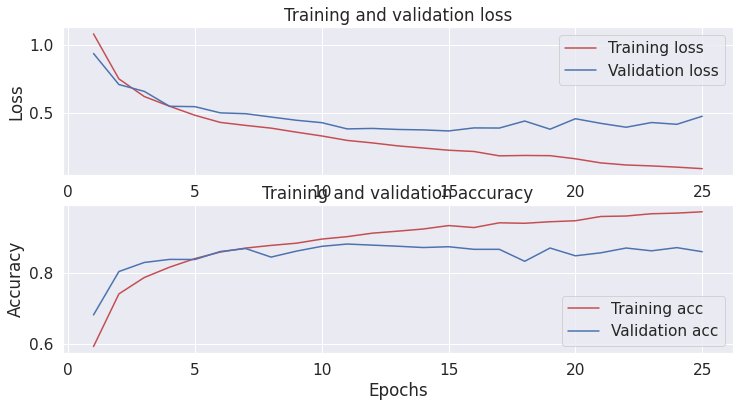

In [43]:
### Analying preformance of the model

history_dict = hist.history


print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [44]:
### Defining functing to get the minimum value loss and maximum accuracy in Training


def get_min_val_loss_epoch(history):
    return "0"+str(np.argmin(hist.history['val_loss'])+1)

def get_max_val_acc_epoch(history):
    return "0"+str(np.argmax(hist.history['val_categorical_accuracy'])+1)

### Evaluating model

In [46]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test_cat )

print(f'Loss: {test_loss}')
print(f'Accuracy: {test_accuracy}')


160/160 [==============================] - 28s 176ms/step - loss: 0.4594 - categorical_accuracy: 0.8682
Loss: 0.45935651659965515
Accuracy: 0.8681942820549011


In [47]:
epoch_num = get_max_val_acc_epoch(hist)
epoch_num
# model.load_weights(output_dir+"/weights."+epoch_num+".hdf5") # Load in model weights

'011'

In [48]:
### Model Predictions

y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

160/160 [==============================] - 32s 171ms/step


Accuracy: 0.8681942812377595


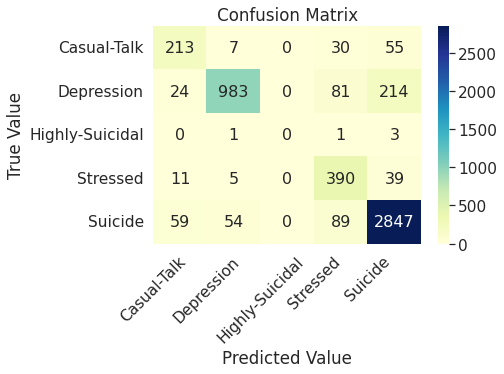

In [49]:
### Confustion Matrix

print("Accuracy:", accuracy_score(y_test, y_hat))
print_cf1(y_test, y_hat)

In [50]:
### Classification Report

print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       0.69      0.70      0.70       305
     Depression       0.94      0.75      0.84      1302
Highly-Suicidal       0.00      0.00      0.00         5
       Stressed       0.66      0.88      0.75       445
        Suicide       0.90      0.93      0.92      3049

       accuracy                           0.87      5106
      macro avg       0.64      0.65      0.64      5106
   weighted avg       0.88      0.87      0.87      5106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
### Inspecting data that was not classified properly
[print(example, '\n') for example in x_test[(y_test == 2) & (np.asarray(y_hat) == 0)][:5]];


## Saving and Loading model

In [52]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/model'

In [53]:
from tensorflow.keras.models import save_model, load_model

save_model(model,"bert_nov6.h5")

model.save("bert_nov6.h5")


In [86]:
loaded_model=load_model("LSTM_bert_model_epoch_11.00__val_loss_0.38__val_accuracy_0.88.h5",
                        custom_objects={'TFBertModel':TFBertModel})

#### evaluating loaded_model

In [87]:
test_loss, test_accuracy = loaded_model.evaluate(X_test,Y_test_cat)

print(f'Loss: {test_loss}')
print(f'Accuracy: {test_accuracy}')


160/160 [==============================] - 33s 177ms/step - loss: 0.4009 - categorical_accuracy: 0.8733
Loss: 0.40085119009017944
Accuracy: 0.8732863068580627


In [88]:
y_test_probs = loaded_model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

160/160 [==============================] - 32s 172ms/step


Accuracy: 0.873286329808069


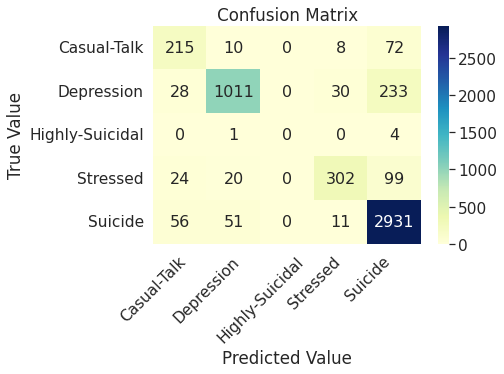

In [89]:
print("Accuracy:", accuracy_score(y_test, y_hat))
print_cf1(y_test, y_hat)

In [90]:
print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       0.67      0.70      0.68       305
     Depression       0.92      0.78      0.84      1302
Highly-Suicidal       0.00      0.00      0.00         5
       Stressed       0.86      0.68      0.76       445
        Suicide       0.88      0.96      0.92      3049

       accuracy                           0.87      5106
      macro avg       0.67      0.62      0.64      5106
   weighted avg       0.87      0.87      0.87      5106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test the model from out of the box data that is not from reditt

In [91]:
sentiment_model=loaded_model

In [93]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels_5=['Casual-Talk', 'Depression', 'Highly-Suicidal', 'Stressed', 'Suicide']
def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=500, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_token': tf.cast(token.input_ids, tf.float64),
        'masked_token': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=labels_5):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [94]:
input_text = ("I don 't deserve to be alive. I don't want to face the trials of reality, which is obviously cowardice. I have let this cowardice envelop me, and I can't shake it off.")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:     {result}")

1/1 [==============================] - 5s 5s/step
Predicted Sentiment:     Suicide


In [95]:
input_text = ("I will be - You lookup. Stars little lights  Little places where you Cannot live with your  Lungs and your skin But  with your heart. My little world will meet, Yours and yours mine.  My organs, though left Behind in the earth to become The trees, or to live and Be wanted in another's body, I will be there as Another dot to join the dots, So that when you look up, I will be there, and you know  I will be free.")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 64ms/step
Predicted Sentiment: Suicide


In [96]:
input_text = ("I guess I'm nothing more than another suicidal white girl," "Just another first-world brat succumbing to society's perfect illusions ")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 63ms/step
Predicted Sentiment: Suicide


In [97]:
input_text = ("We are each given a life. We're supposed to live it. I don 't. It's as simple as that It comes suddenly and then dissolves")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 63ms/step
Predicted Sentiment: Suicide


In [98]:
input_text = ("if I fail these exams, I know that my will be ruined and I can kiss University goodbye. I can kiss my life goodbye. All I want is to be a good psychologist. I can't do that without a proper degree and a Masters")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 64ms/step
Predicted Sentiment: Depression


In [99]:
input_text = ("i will die")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 66ms/step
Predicted Sentiment: Suicide


In [100]:
input_text = ("i want to die")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 65ms/step
Predicted Sentiment: Suicide


In [101]:
input_text = ("i want to kill myself")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 66ms/step
Predicted Sentiment: Suicide


In [102]:
# input_text = ("i forgot my car keys, i will jump out of the building")
# input_text= ("just die")
input_text =(" i will jump out of the building")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:    {result}")

1/1 [==============================] - 0s 63ms/step
Predicted Sentiment:    Suicide


In [103]:
# input_text = ("i forgot my car keys, i will jump on the floor")
# input_text= ("just die")
input_text =("my partner broke up with me, i'm in hundered of thousands in debt, i dont have any alternative, i will jump out of the building")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:    {result}")

1/1 [==============================] - 0s 63ms/step
Predicted Sentiment:    Suicide


In [104]:
# input_text = (" ")
input_text= ("just kill yourself")

processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:    {result}")

1/1 [==============================] - 0s 63ms/step
Predicted Sentiment:    Suicide


In [105]:
input_text = ("Despondency failure at not doing home work sooner, convinced that I was now a total failure, total lack of motivation, fears about the future")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 64ms/step
Predicted Sentiment: Suicide


In [106]:


input_text = ("I taught two people the value of life, You will lose me. My god, it will destroy you. What I will do, will be unforgiveable. I will commit the worst thing you can ever do to someone who loves you: killing yourself The scary thing is, I'm okay with that I am not sad so much as gone")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 63ms/step
Predicted Sentiment: Suicide


In [107]:
input_text=("'sorry if this is awfully spelt or something doing this a i can t sleep i have been really sick recently and i have been missing a lot of work and college i have had a bad time with my family and it s only gotten weirder ever since i tried to end it all they will be nice to me and then act like i am a bad person maybe i am i don t talk to them or go near them a all they do is speak badly about me i am in a great relationship and have lot of people who love and care for me but i suffer really badly with depression my depression ha lead to me not being able to shower or brush my teeth getting awful grade at college and just not being around people i partly blame my antidepressant and my unwillingness to call up for a new prescription so i am suffering i have lost all joy in life again a all you can feel is doubt and dread fear of entering college again and being with my family i am just a failure and wats of oxygen which would be better to die and get it all over with i constantly think about ending it every day the idea of just disappearing is so welcomed in my mind that if plague every waking moment and hour yet it just feel right especially a this all run through your head making you suffer till stupid hour in the morning a all you want is to get those pill or that blade and just die for your own betterment")

processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 65ms/step
Predicted Sentiment: Suicide


In [108]:
# input_text=("i have therapy every week other week and each session it get 10x worse because of last week s session i almost killed myself because i didn t want to do another all i have to talk about is school and not even thing that happen in school like dance or classmate stuff like that since i do online it s just schoolwork every time i get asked so what ha happened since our last session absolutely fucking nothing i have absolutely nothing to talk about to anyone and on top of that even i did have something to talk about my extreme social anxiety and insecurity fill in i can feel everyone around me getting so bored and annoyed with me mom think i m not good enough i ll never be the person dad want me to be best friend barely tell me anything anymore haven t talked to my brother in a whole day therapist is clearly getting bored of the 10 minute session because i have nothing going on in my life i wa literally going to km before today so i didn t have to do another session because i knew how it would go today and surprise surprise i wa right once again everything i tell my therapist about school he talk to my parent about it what happened to confidentiality i accidentally told him something that i wasn t going to only because there wa nothing else to talk about and now he s going to talk to my mom about it and our next session is going to be with my mom all i said wa that schoolwork give me panic attack what the fuck so over it i wa planning on staying until sunday 2 of my favorite singer are releasing new music and the season premiere of my favorite show is starting but i can not wait any fucking longer too much pain too much stress too much anxiety too much irrelevent bullshit too much boredom im out of here")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 64ms/step
Predicted Sentiment: Suicide


In [109]:
# input_text=("i have accidentally cut off all of my friend almost completely i barely talk to my family member i just want to sleep forever and not have to talk to anyone or do anything i feel like my entire life i have had to be okay 24 7 or it s a problem for someone and i m a burden and when i did ask for help i wa called selfish and berated and sent to the same hospital 3 time where i went through so much trauma at such a young age i feel like i can t function i am at such a low point but i can t say anything to anyone because i don t want to be seen a crazy or weak and i absolutely can t go back to the hospital i have to just put everything away and distract myself but i feel like i can t anymore and i m going insane")
input_text=("i m really close to just buying a shotgun online i don t want my mind changed i want someone to give me permission to leave i try to tell people how i feel like my therapist and such and they tell me i need to find my own way like lol i ve found it age ago and nobody will let me do it but you know what no one can really stop me if i really want to right now i m so drunk and high i feel fuckin great i m sure happy that i now have the power in my hand to do what i ve always wanted to do i guess i m just looking for someone to do it with me anyone else want to join me i don t want to be lonely in this venture crown apple royal is great")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 64ms/step
Predicted Sentiment: Depression
